Output variable -> y Binomial("yes" or "no")

y -> Whether the client has subscribed a term deposit or not

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

**Loading Data**

In [3]:
df = pd.read_csv(r"C:\Users\minal\ExcelR\bank-full.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**EDA**

In [4]:
df.shape

(45211, 17)

<AxesSubplot:>

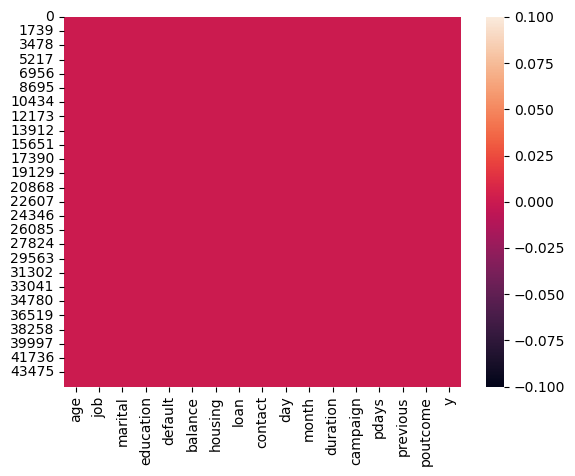

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
int_columns = [col for col in df.columns if df[col].dtype=='int64']

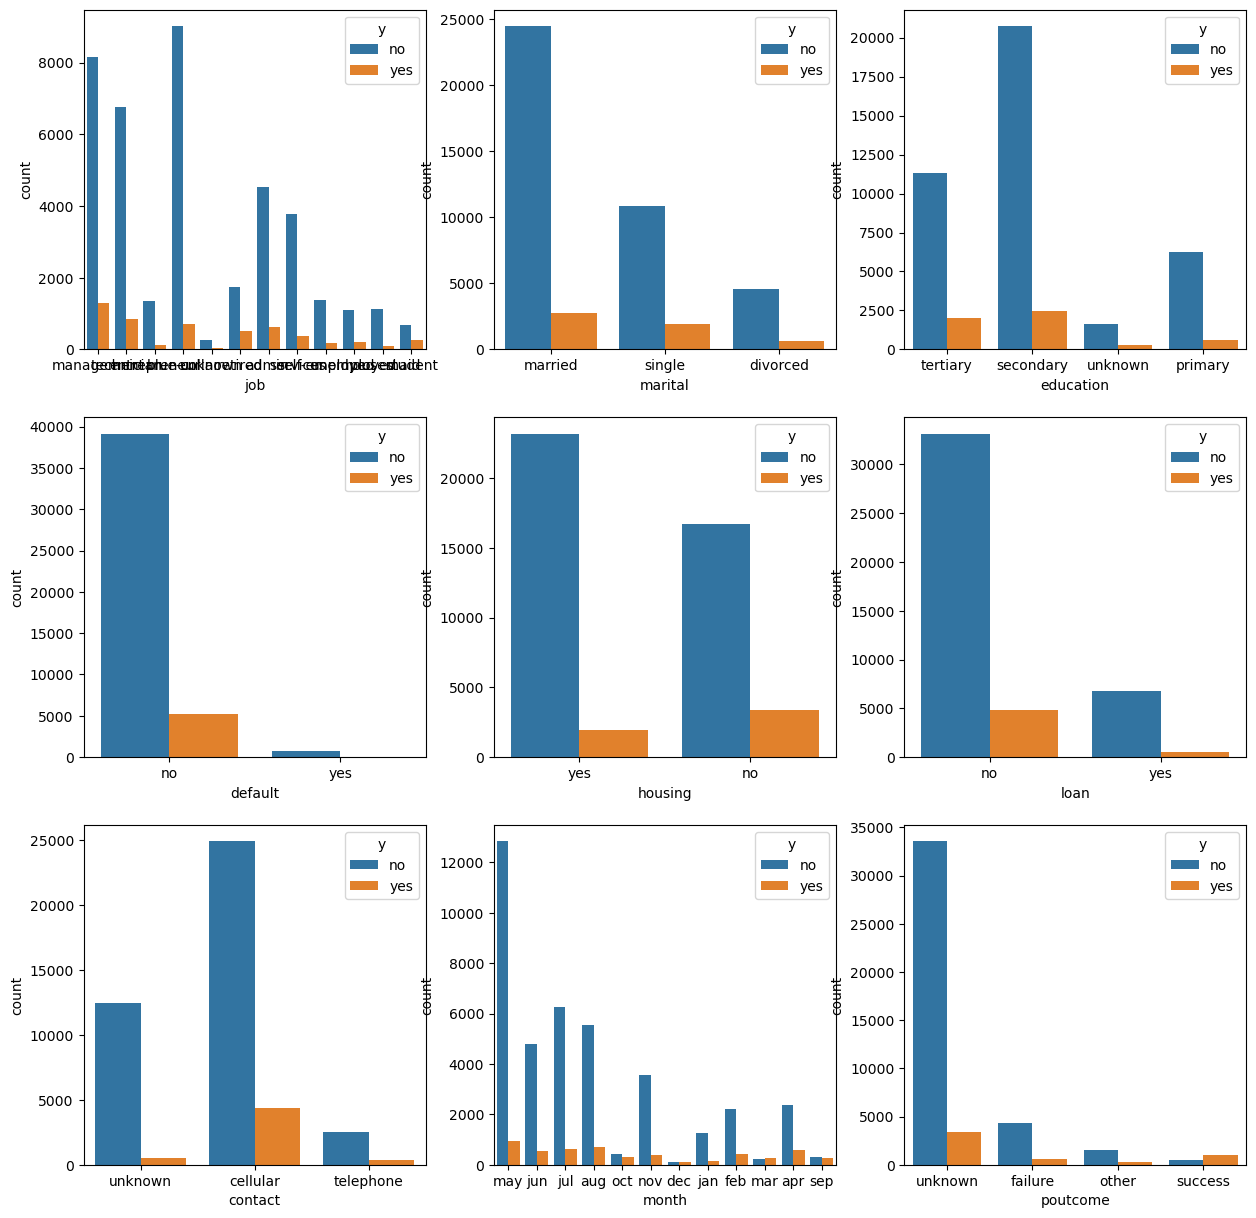

In [10]:
plt.figure(figsize=(15,15))
for i in range(len(cat_columns)):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=cat_columns[i], hue='y')

In [11]:
int_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


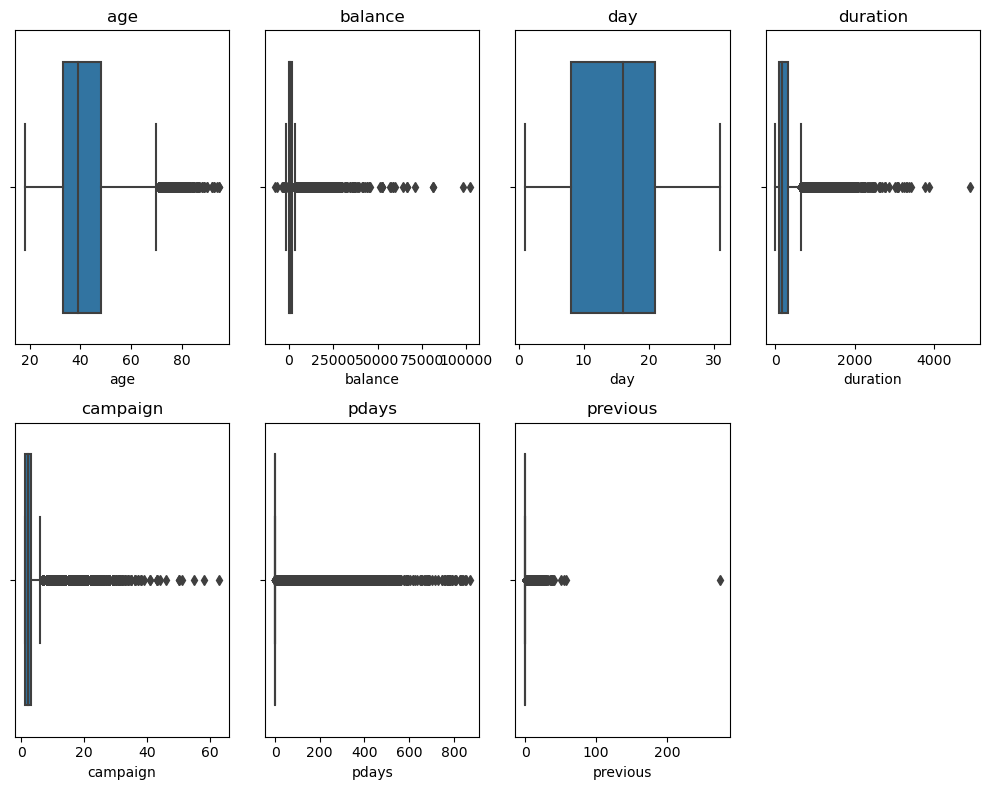

In [15]:
plt.figure(figsize=(10,8))

for i in range(len(int_columns)):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=df, x=int_columns[i])
    plt.title(int_columns[i])

plt.tight_layout()

<AxesSubplot:>

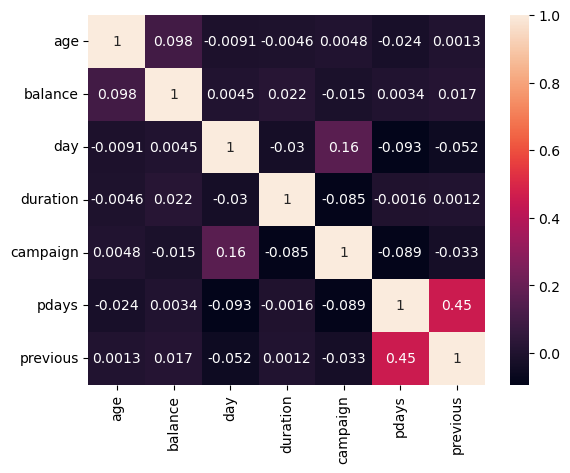

In [17]:
sns.heatmap(df[int_columns].corr(),annot=True)

**Separating x and y variables**

In [18]:
x = df.iloc[:,0:16]
y = df.iloc[:,-1]

**Conversion of categorical columns to dummy numerical columns**

In [19]:
x = pd.get_dummies(x)
y = pd.get_dummies(y)
y = y['yes']

**Standerdizing the x**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

**Creating and training Logistic Regression model**

In [21]:
logreg = LogisticRegression()
logreg.fit(x,y)

LogisticRegression()

**Predicting values**

In [22]:
y_pred = logreg.predict(x)

In [23]:
y_pred_df= pd.DataFrame({'actual': y, 'predicted': logreg.predict(x)})
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


**Checking accuracy of the model**

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[38941   981]
 [ 3457  1832]]


In [25]:
#Accuracy
#((39133+1196)/(39133+789+4093+1196))*100    or
logreg.score(x,y)*100

90.18380482625909

We get 90% of accuracy

##### ***ROC Curve***

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)
auc

0.6609031802788741

Text(0, 0.5, 'True positive rate')

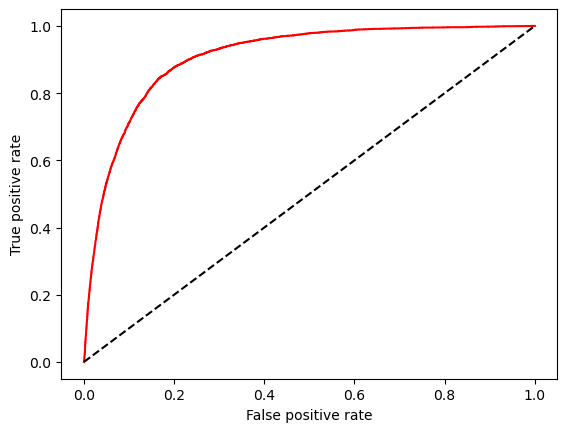

In [27]:
plt.plot(fpr, tpr,color='red')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')